<h1 align="center">RESULTS: Comparision of Tax Compliance Baseline and  Lower Tax on Employees   </h1> 




This file generates  aggregate and  cross-sectional moments using the simulated data. The simlations are generated using the simulate.py fle. Please update the paths to the simulation data before running.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import stats
import os.path
pd.options.display.float_format = '{:.3f}'.format
pd.set_option('display.max_colwidth', -1)
from SCEconomy import *
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib as mpl
mpl.rc("savefig",dpi=200)
from matplotlib import pyplot as plt
# plt.rcParams["figure.figsize"] = (10.,10.)

In [2]:
from IPython.display import HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
df_baseline=[]
df_target=[]
def gini(series, weights):
    if series.size!=weights.size:
        print("Weights are not the same size as the series")
        return
    sorted_series = series.sort_values()
    height, area = 0, 0
    for i in range(series.size):
        value = series[sorted_series.index[i]]
        wgt = weights[sorted_series.index[i]]
        height += wgt*value
        area += wgt*(height - value / 2)
    fair_area = height * weights.sum() / 2.
    return (fair_area - area) / fair_area


def gini_alt(series):
    csum= 0.0
    N=len(series)
    for i in range(N):
        for j in range(N):
            value_i = series.iloc[i]
            value_j = series.iloc[j]
            csum+=np.abs(value_i-value_j)
        
    gini_val=0.5*(csum/(N)**2)/series.mean()
    
    return gini_val


def Lorenz(series,quantiles):
    N=len(quantiles)
    Lz=np.zeros(N)
    for n in range(N):
        selection = series<series.quantile(quantiles[n])
        Lz[n]=series[selection].sum()/series.sum()
               
        
    return  Lz


def uploadData(case,w,rs,rc,p,delta):
    data=pd.DataFrame()
    is_iz=pd.read_csv(case+'/is_to_iz.csv',delim_whitespace=True,header=None)
    zgrid=pd.read_csv(case+'/zgrid.csv',delim_whitespace=True,header=None)
    is_to_ieps=pd.read_csv(case+'/is_to_ieps.csv', delim_whitespace=True,header=None)
    epsgrid=pd.read_csv(case+'/epsgrid.csv', delim_whitespace=True,header=None)
    T=100-1
    
    data['s_ind_']=pd.read_csv(case+'/data_i_s.csv', delim_whitespace=True,header=None).iloc[:,T-1]
    data['s_ind']=pd.read_csv(case+'/data_i_s.csv', delim_whitespace=True,header=None, usecols=[T])
    
    
    data['eps']=epsgrid.values.flatten()[is_to_ieps.astype('int').values.flatten()[data.s_ind.astype('int').values.flatten()]]   
    data['eps_']=epsgrid.values.flatten()[is_to_ieps.astype('int').values.flatten()[data.s_ind_.astype('int').values.flatten()]]   
    data['iz']=is_iz.astype('int').values.flatten()[data.s_ind.astype('int').values.flatten()]
    data['iz_']=is_iz.astype('int').values.flatten()[data.s_ind_.astype('int').values.flatten()]
    data['ieps']=is_to_ieps.astype('int').values.flatten()[data.s_ind.astype('int').values.flatten()]  
    data['ieps_']=is_to_ieps.astype('int').values.flatten()[data.s_ind_.astype('int').values.flatten()]
    data['z']=zgrid.values.flatten()[is_iz.astype('int').values.flatten()[data.s_ind.astype('int').values.flatten()]]    
    data['z_']=zgrid.values.flatten()[is_iz.astype('int').values.flatten()[data.s_ind_.astype('int').values.flatten()]]    
    data['ys']=pd.read_csv(case+'/data_ys.csv', delim_whitespace=True,header=None, usecols=[T])
    data['ys_']=pd.read_csv(case+'/data_ys.csv', delim_whitespace=True,header=None, usecols=[T-1])
    data['ks']=pd.read_csv(case+'/data_ks.csv', delim_whitespace=True,header=None, usecols=[T])
    data['ns']=pd.read_csv(case+'/data_ns.csv', delim_whitespace=True,header=None, usecols=[T])
    data['x']=pd.read_csv(case+'/data_x.csv',  delim_whitespace=True,header=None, usecols=[T])
    data['n']=pd.read_csv(case+'/data_n.csv', delim_whitespace=True,header=None, usecols=[T])
    data['ks_']=pd.read_csv(case+'/data_ks.csv', delim_whitespace=True,header=None, usecols=[T-1])
    data['ns_']=pd.read_csv(case+'/data_ns.csv', delim_whitespace=True,header=None, usecols=[T-1])
    data['x_']=pd.read_csv(case+'/data_x.csv',  delim_whitespace=True,header=None, usecols=[T-1])
    data['n_']=pd.read_csv(case+'/data_n.csv', delim_whitespace=True,header=None, usecols=[T-1])
    data['flagC']=pd.read_csv(case+'/data_is_c.csv', delim_whitespace=True,header=None, usecols=[T])
    data['flagC_']=pd.read_csv(case+'/data_is_c.csv', delim_whitespace=True,header=None, usecols=[T-1])
    data['flagO']=pd.read_csv(case+'/data_is_o.csv',delim_whitespace=True,header=None, usecols=[T])
    data['kappa']=pd.read_csv(case+'/data_kap.csv', delim_whitespace=True,header=None, usecols=[T])
    data['hkap']=pd.read_csv(case+'/data_hkap.csv',  delim_whitespace=True,header=None, usecols=[T])
    data['hy']=pd.read_csv(case+'/data_hy.csv',  delim_whitespace=True,header=None, usecols=[T])
    data['s_age']=pd.read_csv(case+'/s_age.csv',  delim_whitespace=True,header=None)
    data['sind_age']=pd.read_csv(case+'/sind_age.csv',  delim_whitespace=True,header=None)
    data['ind_age']=pd.read_csv(case+'/ind_age.csv',  delim_whitespace=True,header=None)
    data['c_age']=pd.read_csv(case+'/c_age.csv',  delim_whitespace=True,header=None)
    data['div_']=pd.read_csv(case+'/data_div_sweat.csv',  delim_whitespace=True,header=None, usecols=[T-1])
    data['div']= pd.read_csv(case+'/data_div_sweat.csv',  delim_whitespace=True,header=None, usecols=[T])
    data['val_sdf_']=pd.read_csv(case+'/data_val_sweat_dyna_sdf.csv',  delim_whitespace=True,header=None, usecols=[T-1])
    data['val_mf_']=pd.read_csv(case+'/data_val_sweat_dyna_fix.csv',  delim_whitespace=True,header=None, usecols=[T-1])

    data['val_sdf']=pd.read_csv(case+'/data_val_sweat_dyna_sdf.csv',  delim_whitespace=True,header=None, usecols=[T])
    data['val_mf']=pd.read_csv(case+'/data_val_sweat_dyna_fix.csv',  delim_whitespace=True,header=None, usecols=[T])
    data['a']= pd.read_csv(case+'/data_a.csv',  delim_whitespace=True,header=None, usecols=[T])
    
    data['flagC']=data['flagC'].astype('bool')
    data['flagC_']=data['flagC_'].astype('bool')
    data['flagO']=data['flagO'].astype('bool')
    data['expenses']=(rs+delta)*data['ks']+w*data['ns']+data['x']
    data['expenses_']=(rs+delta)*data['ks_']+w*data['ns_']+data['x_']
    data['wns']=data['ns']*w
    data['pys']=p*data['ys']

    data['bus_inc']=p*data['ys']-data['expenses']
    data['bus_inc_']=p*data['ys_']-data['expenses_']
    data['lab_inc']=data.eps*w*data.n
    data['lab_inc_']=data.eps_*w*data.n_
    data['n_e']=data['hkap']+data['hy']
    data['ne']=data['n_e']
    data['kappa_adj']=(data.kappa**0.15)*data.z
    data['ret_sdf']=(data['val_sdf']+data['div_'])/data['val_sdf_']+0.02
    data['ret_mf']=(data['val_mf']+data['div_'])/data['val_mf_']+0.02
    data['div_yld_sdf']=(data['div'])/data['val_sdf']
    data['div_yld_mf']=(data['div'])/data['val_mf']
    #data['intan_int_sdf']=data['val_sdf'] /(data['val_sdf']+data['ks'])
    #data['intan_int_mf']=data['val_mf'] /(data['val_mf']+data['ks'])
    data['profit_rate']=100*data['bus_inc']/data['ks']
    data['measured_markups']=100*(data['bus_inc'])/(data['x']+(rs+delta)*data['ks']+w*data['ns'])
    data['measured_markups_alt']=100*(data['bus_inc']+data['x'])/((rs+delta)*data['ks']+w*data['ns'])
    data['x_pys']=data['x']/(p*data['ys'])
    data['cogs']=((rs+delta)*data['ks']+w*data['ns']+data['x'])    
    data['wealth_sdf']=data['a']+data['val_sdf']   
    data['wealth_mf']=data['a']+data['val_mf']   
    data['ztilde'] = np.log(data['z'])
    data['zkapphi']=data['z']*data['kappa']**(0.15)
    data['ztilde_meas'] = np.log(data['ys']/(data['ks']**(0.333)*data['ns']**(0.666)))
    data['inc']=0.0
    data['inc'][data['flagC']==True]=data[data['flagC']==True]['lab_inc']
    data['inc'][data['flagC']==False]=data[data['flagC']==False]['bus_inc']
    data['tot_inc']=data['inc']+rc*data['a'] 
    if os.path.exists(case+'/data_R.csv'):
        data['R']= pd.read_csv(case+'/data_R.csv',  delim_whitespace=True,header=None, usecols=[T])
        data['intan_int']=data['R']/(data['R']+data['ks'])
        data['wealth_R']=0.0
        data['wealth_R'][data['flagC']==True]=data[data['flagC']==True]['a']   
        data['wealth_R'][data['flagC']==False]=data[data['flagC']==False]['a']+data[data['flagC']==False]['R']   
        data['wealth_income_ratio']=data['wealth_R']/data['tot_inc']
  
  

    data['wgt']=1.0
    return data




def get_prices(path_baseline,momfilename):
    with open (path_baseline+ momfilename, 'rt') as myfile:  # Open file lorem.txt for reading text
        for myline in myfile:                 # For each line, read it to a string 
          #print("gdp line")
          #print(myline.find("GDP("))
          if myline.find("w")==0:
            #print(myline)
            w=float(myline[ myline.find("=")+1:])
          if myline.find("S-good price")==0:
            #print(myline)
            p=float(myline[ myline.find("=")+1:])
          if myline.find("rc")==0:
            #print(myline)
            rc=float(myline[ myline.find("=")+1:])
          if myline.find("rs")==0:
            #print(myline)
            rs=float(myline[ myline.find("=")+1:])
          if myline.find("GDP(")==2:
            #print(myline)
            GVA=float(myline[ myline.find("=")+1:])
          if myline.find("investment,")==2:
            #print(myline)
            x=float(myline[ myline.find("=")+1:])
            #print("GDP = "+ str(GVA-x))
          if myline.find("delk ")==0:
            #print(myline)
            delta=float(myline[ myline.find("=")+1:])
            #print("delta= "+ str(delta))
            
    return w,p,rc,rs,delta,GVA-x



def decomposition (var_bin,bins,varlist):
    print('')
    print("SORTED BY " + var_bin)
    print("BINS = " + str([round(b,2) for b in bins ]) )
    

    data['bin_' + var_bin] = pd.cut(data[var_bin], bins, labels = False)     
    mean_baseline=data.groupby('bin_' + var_bin).mean()[varlist]
    count_baseline=data.groupby('bin_' + var_bin).count()[varlist]
    
    
    print("-------------- baseline means ----------")
    print(mean_baseline)
    print("-------------- baseline counts ----------")
    print(count_baseline)
    print('')
    return mean_baseline,count_baseline

def format_table(data,total):
    results=[]
    results=pd.DataFrame(data) 
    results['bins/total']=(sorted(pd.cut(df_baseline[var_bin], bins).unique()) )
    cols = results.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    results=results[cols]  #    OR    df = df.ix[:, cols]
    results=results.append(total,ignore_index=True)
    results.iloc[-1,0]='total'
    
    return results


def print_results (var_bin,bins,varlist,df_baseline=df_baseline,df_target=df_target):
    print('')
    print("SORTED BY " + var_bin)
    print("BINS = " + str([round(b,2) for b in bins ]) )
    

    df_baseline['bin_' + var_bin] = pd.cut(df_baseline[var_bin], bins, labels = False) 
    df_target['bin_' + var_bin] = pd.cut(df_target[var_bin], bins, labels = False) 
    
    mean_baseline=df_baseline.groupby('bin_' + var_bin).mean()[varlist]
    mean_target=df_target.groupby('bin_' + var_bin).mean()[varlist]
    sum_baseline=df_baseline.groupby('bin_' + var_bin).sum()[varlist]
    sum_target=df_target.groupby('bin_' + var_bin).sum()[varlist]
    count_baseline=df_baseline.groupby('bin_' + var_bin).count()[varlist]
    count_target=df_target.groupby('bin_' + var_bin).count()[varlist]
    
    intensive=(mean_target-mean_baseline)*(count_target+count_baseline)/2
    extensive=(count_target-count_baseline)*(mean_target+mean_baseline)/2
    total=intensive+extensive
    intensive=100.*(intensive/(total.sum()))
    extensive=100.*(extensive/(total.sum()))
    total_per_change=(100*total.sum()/sum_baseline.sum()).T
    intensive_alt=intensive*total_per_change*(1.0/100)
    extensive_alt=extensive*total_per_change*(1.0/100)
   
    return total,sum_baseline,intensive_alt,extensive_alt

   

    print('')
    
def __extract_num__(item_name, text):
    
    import re
    for ln in text.splitlines():
        if ln.startswith(item_name):

            match = re.search(r'[-+]?[0-9]*\.?[0-9]+([eE][-+]?[0-9]+)?', ln[len(item_name):])

            if match is not None:
                return float(match.group(0))
            else:
                return np.nan
                    
                
    return np.nan

def get_data_textbuffer(item_name, outputs):
    
    return np.array([__extract_num__(item_name, text) for text in outputs])
    
   

## Set paths

In [4]:
casename='newbench_compliance'
targetname='newbench_compliance_taunonly'
#path_baseline = '/home/shared/yaoxx366/save_data/save_data_'+casename+'/'
path_baseline='./save_data_'+casename
path_table = './save_data_'+casename+'/'
path_target = './save_data_'+ targetname + '/'
momfilename_baseline= 'paras_mom_' + casename  + '.txt'
momfilename_target= 'paras_mom_' + targetname  + '.txt'
pathtosiminitbase='./save_data_'+ casename+  '/econ_' +casename + '.pickle'
pathtosiminittarget='./save_data_'+ targetname+  '/econ_' +targetname + '.pickle'
my_file_handle=open(path_baseline+ '/' + momfilename_baseline )
textbuffer_baseline=my_file_handle.read()

# Calibration

## Preferences

In [5]:
print(pd.read_csv(path_table + 'preferences.csv').to_string(header=None))

Discount factor                           0.980
Paternalistic discount factor             1.000
Consumption weight                        0.420
Leisure weight                            0.580
Intertemporal elasticity inverse          1.500
C-corporate good share in consumption     0.449
Love of business parameter                0.000
Labor productivity decline for the old    0.500
Business productivity decline for the old 0.500


## Life cycle related params

In [6]:
print(pd.read_csv(path_table + 'age_transition_table.csv', skiprows = 1).to_string(index=None))

Unnamed: 0     y     o
 y         0.978 0.022
 o         0.067 0.933


## Technology

In [7]:
print(pd.read_csv(path_table + 'technologies.csv').to_string(header=None))

Technology growth                                                      0.020
C-corporate fixed asset share                                          0.502
Private business fixed asset share                                     0.300
Private business sweat capital share                                   0.150
Private business ces labor composite share                             0.550
Private business employee hours share parameter in ces labor composite 0.575
Private business hours substitution parameter in ces labor composite   0.500
Fixed asset depreciation                                               0.041
Sweat capital depreciation                                             0.058
Sweat capital owner hour share                                         0.408
Sweat capital c-good share                                             0.592
Sweat capital deterioration for workers                                0.500
Sweat capital deterioration for bequests                               0.100

## Shocks

### Business skill

In [8]:
# np.loadtxt(path_table + 'business_productivity_transition_table.csv', skiprows = 2, skipcolumn = 1)
# pd.read_csv(path_table + 'business_productivity_transition_table.csv', skiprows = 1)


print(pd.Series(pd.read_csv(path_table + 'business_productivity_transition_table.csv', skiprows = 1).iloc[:,0]).to_frame('zgrid').T)
print()
print(pd.DataFrame(pd.read_csv(path_table + 'business_productivity_transition_table.csv', skiprows = 1).iloc[:,1:].values))


       0  1  2  3  4
zgrid  0  1  2  3  4

      0     1     2     3     4
0 0.612 0.170 0.098 0.065 0.055
1 0.172 0.551 0.187 0.064 0.025
2 0.099 0.191 0.475 0.190 0.045
3 0.060 0.055 0.164 0.558 0.164
4 0.046 0.009 0.034 0.135 0.776


### Labor skills

In [9]:
print(pd.Series(pd.read_csv(path_table + 'labor_productivity_transition_table.csv', skiprows = 1).iloc[:,0]).to_frame('epsgrid').T)
print('')
print(pd.DataFrame(pd.read_csv(path_table + 'labor_productivity_transition_table.csv', skiprows = 1).iloc[:,1:].values))


         0  1  2  3  4
epsgrid  0  1  2  3  4

      0     1     2     3     4
0 0.424 0.549 0.027 0.000 0.000
1 0.046 0.621 0.327 0.005 0.000
2 0.001 0.145 0.709 0.145 0.001
3 0.000 0.005 0.327 0.621 0.046
4 0.000 0.000 0.027 0.549 0.424


## Tax policy

### Pass thru income tax

In [10]:
print(pd.read_csv(path_table + 'business_income_tax.csv').to_string(index=None))

 bbracket_left  bbracket_right   taub   psib
-inf             0.153         0.216  0.045 
0.153            0.304         0.254  0.063 
0.304            0.912         0.272  0.080 
0.912            2.667         0.312  0.193 
2.667            5.727         0.331  0.345 
5.727            9.104         0.339  0.477 
9.104            inf           0.350  0.785 


### Labor income tax

In [11]:
print(pd.read_csv(path_table + 'labor_income_tax.csv').to_string(index=None))

 nbracket_left  nbracket_right   taun   psin
-inf             0.173         0.293  -0.033
0.173            0.262         0.324  -0.016
0.262            0.404         0.343  -0.001
0.404            0.732         0.390  0.058 
0.732            1.409         0.400  0.080 
1.409            3.3138        0.408  0.115 
3.314            inf           0.419  0.227 


### Other taxes

In [12]:
print(pd.read_csv(path_table + 'policies.csv').to_string(header=None))

Consumption tax                        0.065
Dividends tax                          0.133
Profits tax                            0.360
Government expenditure relative to GDP 0.133
Retirement Transfer                    0.800


# Aggregates

In [13]:
mom=pd.read_csv(path_table + 'moments.csv')
mom.columns=['desc','val']    
tax=pd.read_csv(path_table + 'policies.csv')
tax.columns=['val']
cal=pd.read_csv(path_table + 'technologies.csv')
cal.columns=['val']
w=float(mom[mom.desc.str.strip()=='Wage (w)']['val'].values)
p=float(mom[mom.desc.str.strip()=='S-good price (p)']['val'].values)
rc=float(mom[mom.desc.str.strip()=='Interest rate (rc)']['val'].values)
GDP=float(mom[mom.desc.str.strip()=='GDP(yc + yn + p*Eys - Ex)']['val'].values)
taup=float(tax[tax.index.str.strip()=='Profits tax']['val'].values)
rs=rc*(1-taup)
delta=float(cal[cal.index.str.strip()=='Fixed asset depreciation']['val'].values)

In [14]:
data=uploadData(path_baseline,w,rs,rc,p,delta)

## GDP
We normalize several things in the paper by GDP

In [15]:
print(GDP)

3.0955824458731653


## Aggregate markups
Agg markups  is defined as  sum of business incomes in passthrus / sum rental and wage expenses in pass thrus 

In [16]:
print(100*data.bus_inc.sum()/data.cogs.sum())

38.62891152584405


## Aggregate profitability
Agg profitability is defined as  sum of business incomes in passthrus / sum of physical capital used in pass thrus 

In [17]:
print(100*data.bus_inc.sum()/data.ks.sum())

7.902559038317037


## National Accounts

### income share

In [18]:
print(pd.read_csv(path_table + 'income_shares.csv').to_string(header=None,index=None))

 Business Income                              0.736
 Sweat labor income                           0.087
 Non-sweat labor income                       0.331
 Non-sweat labor income C corporations        0.222
 Non-sweat labor income pass through business 0.109
 Non-sweat capital income                     0.318
 Non-sweat capital income rents               0.189
 Non-sweat capital income depreciation        0.129
 Non-business Income                          0.264


### product share

In [19]:
print(pd.read_csv(path_table + 'product_shares.csv').to_string(header=None,index=None))

 Private Consumption                        0.566
 Government Consumption                     0.132
 Business Investments C corporations        0.125
 Business Investments pass through business 0.067
 Non-business Investments                   0.109


## Sweat equity by GDP

In [20]:
print(pd.read_csv(path_table + 'sweat_equity_div_gdp.csv').to_string(header=None))

0  discounted by beta_tilde 1.012
1  discounted by owner SDF  0.896


# Age profiles

## distribution by age

In [21]:
df = pd.read_csv(path_table + 'started_n_periods_ago.csv')
print((100*df[df['N periods ago'] <= 40].set_index('N periods ago').iloc[:,0]).to_string(header=None))

0    11.756
1    9.310 
2    7.856 
3    6.899 
4    6.094 
5    5.227 
6    4.715 
7    4.285 
8    3.950 
9    3.324 
10   3.091 
11   2.633 
12   2.571 
13   2.280 
14   2.117 
15   1.938 
16   1.678 
17   1.612 
18   1.491 
19   1.456 
20   1.119 
21   1.032 
22   1.009 
23   0.948 
24   0.867 
25   0.792 
26   0.776 
27   0.678 
28   0.620 
29   0.566 
30   0.520 
31   0.478 
32   0.404 
33   0.395 
34   0.360 
35   0.333 
36   0.343 
37   0.327 
38   0.310 
39   0.225 
40   0.223 


## sweat capital by age

              sind_age  kappa
bin_sind_age                 
0.000        0.000     0.318 
1.000        1.000     0.423 
2.000        2.000     0.463 
3.000        3.000     0.496 
4.000        4.000     0.523 
5.000        5.918     0.530 
6.000        8.909     0.502 
7.000        11.452    0.479 
8.000        13.937    0.450 
9.000        19.690    0.365 
10.000       27.815    0.283 
11.000       32.825    0.255 
12.000       37.830    0.180 
13.000       42.991    0.156 
14.000       47.860    0.126 
15.000       52.746    0.150 
16.000       57.699    0.098 
17.000       68.035    0.084 
18.000       93.048    0.033 


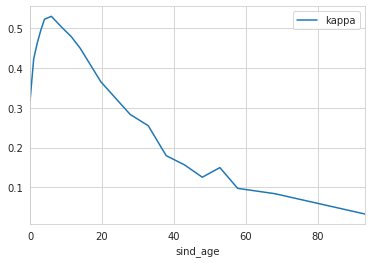

In [22]:
sel=(~data['flagC'] )
var_bin = 'sind_age'
varlist=['kappa','intan_int','ret_sdf','div_yld_sdf','measured_markups','val_sdf','a','wealth_sdf','s_age','sind_age','ind_age','ztilde_meas','ztilde','bus_inc','hy','hkap','n_e','ns','ks','R','x']
bins=[-1,0,1,2,3,4,7,10, 12,15,25,30,35,40,45,50,55,60,80,500 ]
data['bin_' + var_bin] = pd.cut(data[var_bin], bins, labels = False)     
mean_baseline=data[sel].groupby('bin_' + var_bin).mean()[varlist]
count_baseline=data[sel].groupby('bin_' + var_bin).count()[varlist]
mean_baseline[['sind_age','kappa']].plot(x='sind_age',y='kappa')
mean_baseline[['sind_age','kappa']].to_csv('sind_kappa.csv')
print(mean_baseline[['sind_age','kappa']])

## Regression of $\log V_{\kappa}$ on $age,age^2$: Pratts

In [23]:
prattsdata=pd.read_csv('prattsdatabase.csv',encoding='latin-1')    
prattsdata['TargetAge2']=prattsdata['TargetAge']**2

prattsdata['TargetStructureAlt']=prattsdata['TargetStructure'].values
sel=prattsdata['TargetStructure'].isin(['Partnership', 'Limited Partnership', 'LLP'])
prattsdata.loc[sel,'TargetStructureAlt']='Partnership'
sel=prattsdata['TargetStructure'].isin(['Consolidated', 'UK Corporation', 'PC','Non-Profit','Ltd','Limited Corporation'])
prattsdata.loc[sel,'TargetStructureAlt']='Others'
sel=prattsdata['TargetStructure'].isin(['C corporation'])
prattsdata.loc[sel,'TargetStructureAlt']='C Corporation'

naics_labels=['Agriculture, Forestry, Fishing and Hunting',\
        'Mining, Quarrying, and Oil and Gas Extraction',\
        'Utilities',\
        'Construction',\
        'NA1',\
        'Manufacturing',\
        'NA2',\
        'Wholesale Trade',\
        'Retail Trade',\
        'NA3',\
        'Transportation and Warehousing',\
        'NA4',\
        'Information',\
        'Finance and Insurance',\
        'Real Estate and Rental and Leasing',\
        'Professional, Scientific, and Technical Services',\
        'Management of Companies and Enterprises',\
        'Administrative and Support and Waste Management and Remediation Services'\
        'NA5',\
        'Educational Services',\
        'Health Care and Social Assistance',\
        'Arts, Entertainment, and Recreation',\
        'Accommodation and Food Service',\
        'Other Services','Public administration']

len(naics_labels)

naics_code=[11,21,22,23,24,31,35,42,44,46,48,50,51,52,53,54,55,56,61,62,71,72,81,83,92]
n=24


#naics_labels=['Ag. Mining and Utilities',\
#        'Consts and Mfg',\
#        'Trade and warehousing',\
#        'Information and FIRE',\
#        'RE',\
#        'Professional services',\
#        'Nonprof services']

#naics_code=[11,23,42,51,53,54,57,92]

prattsdata['naics_label']=pd.cut(prattsdata['TargetNAICS1']/10**10,naics_code[:n+1],labels=naics_labels[:n],include_lowest=True,right=False)
prattsdata['naics_code_cat']=pd.cut(prattsdata['TargetNAICS1']/10**10,naics_code[:n+1],include_lowest=True,right=False)
prattsdata['naics_2d']=pd.cut(prattsdata['TargetNAICS1']/10**10,naics_code[:n+1],labels=naics_code[:n],include_lowest=True,right=False)

prattsdata['year'] = prattsdata['SaleDate'].str[-4:]
prattsdata['year']=prattsdata['year'].astype(int)



import statsmodels.api as sm

dummies1 = pd.get_dummies(prattsdata['naics_code_cat']).rename(columns=lambda x: 'nacis_code_cat' + str(x))
dummies2 = pd.get_dummies(prattsdata['year']).rename(columns=lambda x: 'year' + str(x))
X = pd.concat([prattsdata[['TargetAge','TargetAge2']],dummies1,dummies2],axis=1)
Y=np.log(prattsdata.TotalIntangiblesPPA)
X = sm.add_constant(X)
selection=(pd.notnull(prattsdata.TargetAge)) & (prattsdata.TotalIntangiblesPPA>0)& ~(prattsdata.TargetStructureAlt=='C Corporation')& ~(prattsdata.TargetStructureAlt=='LLC')
model11 = sm.OLS(Y[selection], X[selection]).fit()
model11.summary()

24

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     TotalIntangiblesPPA   R-squared:                       0.228
Model:                             OLS   Adj. R-squared:                  0.223
Method:                  Least Squares   F-statistic:                     45.30
Date:                 Mon, 15 Jun 2020   Prob (F-statistic):               0.00
Time:                         13:07:22   Log-Likelihood:                -13411.
No. Observations:                 6943   AIC:                         2.691e+04
Df Residuals:                     6897   BIC:                         2.723e+04
Df Model:                           45                                         
Covariance Type:             nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     11.5470      1.145     10.084      0.000       9.302      13.792
TargetAge                  0.0183      0.002      8.629      0.000       0.014       0.022
TargetAge2              -4.99e-05   1.46e-05     -3.413      0.001   -7.86e-05   -2.12e-05
nacis_code_cat[11, 21)    -0.4594      1.285     -0.357      0.721      -2.979       2.060
nacis_code_cat[21, 22)     3.1797      1.294      2.458      0.014       0.644       5.716
nacis_code_cat[22, 23)    -0.5650      1.349     -0.419      0.675      -3.209       2.079
nacis_code_cat[23, 24)    -0.1541      1.194     -0.129      0.897      -2.494       2.186
nacis_code_cat[24, 31) -6.894e-15   1.01e-14     -0.686      0.493   -2.66e-14    1.28e-14
nacis_code_cat[31, 35)     0.2924      1.192      0.245      0.806      -2.044       2.629
nacis_code_cat[35, 42) -1.458e-14    3.9e-14     -0.373      0.709   -9.11e-14    6.19e-14
nacis_code_cat[42, 44)    -1.7597      1.286     -1.369      0.171      -4.280       0.761
nacis_code_cat[44, 46)    -1.0531      1.191     -0.884      0.377      -3.388       1.281
nacis_code_cat[46, 48) -1.401e-14   1.87e-14     -0.751      0.453   -5.06e-14    2.26e-14
nacis_code_cat[48, 50)    -0.6359      1.194     -0.533      0.594      -2.977       1.705
nacis_code_cat[50, 51)  4.997e-15   7.13e-15      0.701      0.484   -8.98e-15     1.9e-14
nacis_code_cat[51, 52)     1.9595      1.198      1.636      0.102      -0.388       4.307
nacis_code_cat[52, 53)     0.4310      1.199      0.360      0.719      -1.919       2.781
nacis_code_cat[53, 54)    -0.5248      1.196     -0.439      0.661      -2.870       1.820
nacis_code_cat[54, 55)     0.3950      1.193      0.331      0.741      -1.944       2.734
nacis_code_cat[55, 56)     5.4398      1.407      3.866      0.000       2.681       8.198
nacis_code_cat[56, 61)    -0.8055      1.192     -0.676      0.499      -3.141       1.530
nacis_code_cat[61, 62)    -1.0929      1.205     -0.907      0.364      -3.455       1.269
nacis_code_cat[62, 71)    -0.5618      1.194     -0.471      0.638      -2.902       1.778
nacis_code_cat[71, 72)    -1.2780      1.201     -1.064      0.287      -3.632       1.076
nacis_code_cat[72, 81)    -1.5446      1.191     -1.297      0.195      -3.879       0.790
nacis_code_cat[81, 83)    -1.6104      1.191     -1.352      0.176      -3.946       0.725
nacis_code_cat[83, 92)  3.713e-15   1.25e-14      0.298      0.766   -2.07e-14    2.82e-14
year1990               -1.387e-14   2.27e-14     -0.612      0.540   -5.83e-14    3.05e-14
year1991               -9.191e-15   8.71e-15     -1.055      0.291   -2.63e-14    7.88e-15
year1992               -1.186e-14   8.03e-15     -1.477      0.140   -2.76e-14    3.88e-15
year1993                  -1.1647      1.142     -1.020      0.308   

## Regression of $\log V_{\kappa}$ on $age,age^2$: Model

In [24]:
sel=(~data['flagC'] )
data['sind_age2']=data['sind_age']**2
X = data[['sind_age','sind_age2']]
Y=np.log(data.R)
X = sm.add_constant(X)
model11 = sm.OLS(Y[sel], X[sel]).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     301.8
Date:                Mon, 15 Jun 2020   Prob (F-statistic):          5.72e-131
Time:                        13:07:22   Log-Likelihood:                -95768.
No. Observations:               48079   AIC:                         1.915e+05
Df Residuals:                   48076   BIC:                         1.916e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4373      0.012   -116.908      0.000      -1.461      -1.413
sind_age       0.0150      0.002      9.538      0.000       0.012       0.018
sind_age2     -0.0006   3.17e-05    -19.324      0.000      -0.001      -0.001
==============================================================================
Omnibus:                     4708.120   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1526.124
Skew:                           0.147   Prob(JB):                         0.00
Kurtosis:                       2.178   Cond. No.                         854.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Business and Labor Income Percentiles

In [25]:
quantiles=pd.DataFrame( (data[data.flagC==True].lab_inc.quantile(np.linspace(0,1,21))))
quantiles['bus_inc']=data[data.flagC==False].bus_inc.quantile(np.linspace(0,1,21))
print(quantiles)

       lab_inc  bus_inc
0.000 0.000    -2.178  
0.050 0.000    -0.418  
0.100 0.776    -0.002  
0.150 1.063    -0.001  
0.200 1.241    -0.000  
0.250 1.274    -0.000  
0.300 1.398    -0.000  
0.350 1.491    -0.000  
0.400 1.579    -0.000  
0.450 1.650    0.000   
0.500 1.717    0.000   
0.550 1.787    0.002   
0.600 1.834    0.021   
0.650 1.971    0.076   
0.700 2.607    0.361   
0.750 2.993    0.552   
0.800 3.199    2.134   
0.850 3.360    2.505   
0.900 3.512    2.699   
0.950 3.692    2.802   
1.000 6.515    3.279   


# Lorenz curves

In [26]:
sel=(~data['flagC'] )
LzData=pd.DataFrame()
LzData['frac_pop']=np.linspace(0,1,21)
LzData['bus_inc']=Lorenz(data[sel]['bus_inc'],LzData.frac_pop)
LzData['kappa']=Lorenz(data[sel]['kappa'],LzData.frac_pop)
LzData['hkap']=Lorenz(data[sel]['hkap'],LzData.frac_pop)
LzData['hy']=Lorenz(data[sel]['hy'],LzData.frac_pop)

LzData['ns']=Lorenz(data[sel]['ns'],LzData.frac_pop)
LzData['ks']=Lorenz(data[sel]['ks'],LzData.frac_pop)
LzData['R']=Lorenz(data[sel]['R'],LzData.frac_pop)
LzData['Vb_sdf']=Lorenz(data[sel]['val_sdf'],LzData.frac_pop)
LzData['Vb_mf']=Lorenz(data[sel]['val_mf'],LzData.frac_pop)

LzData

,frac_pop,bus_inc,kappa,hkap,hy,ns,ks,R,Vb_sdf,Vb_mf
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.050,-0.147,0.000,0.000,0.000,0.000,0.000,0.001,0.018,0.022
2,0.100,-0.148,0.000,0.000,0.000,0.000,0.000,0.002,0.038,0.046
3,0.150,-0.148,0.000,0.000,0.000,0.000,0.000,0.005,0.061,0.071
4,0.200,-0.148,0.000,0.000,0.000,0.000,0.000,0.009,0.086,0.099
5,0.250,-0.148,0.000,0.000,0.000,0.000,0.000,0.013,0.114,0.127
6,0.300,-0.148,0.001,0.000,0.000,0.000,0.000,0.017,0.142,0.157
7,0.350,-0.148,0.004,0.000,0.000,0.000,0.000,0.021,0.172,0.187
8,0.400,-0.148,0.014,0.001,0.000,0.000,0.000,0.025,0.201,0.218
9,0.450,-0.148,0.038,0.001,0.000,0.000,0.000,0.029,0.233,0.250


# Cross Sectional Moments: All Businesses

In [27]:
sel=(~data['flagC'] )

val,cols=stats.describe(data[sel].ret_sdf,data[sel]['wgt'])
moments_only_business=pd.DataFrame(val.T,columns=['gross_returns: sdf'])
moments_only_business.index=cols



val,cols=stats.describe(data[sel].ret_sdf,data[sel]['wgt'])
moments_only_business['gross_returns: sdf']=val


val,cols=stats.describe(data[sel].ret_mf,data[sel]['wgt'])
moments_only_business['gross_returns: mf']=val

sel2=sel&(data['ns']>0)
val,cols=stats.describe(data[sel2].intan_int,data[sel2]['wgt'])
moments_only_business['intan. intensity']=val


val,cols=stats.describe(data[sel].div_yld_sdf,data[sel]['wgt'])
moments_only_business['div yield: sdf']=val


val,cols=stats.describe(data[sel].div_yld_mf,data[sel]['wgt'])
moments_only_business['div yield: mf']=val


val,cols=stats.describe(data[sel2].R,data[sel2]['wgt'])
moments_only_business['market value: R']=val


val,cols=stats.describe(data[sel].val_sdf,data[sel]['wgt'])
moments_only_business['valuation: sdf']=val

val,cols=stats.describe(data[sel].val_mf,data[sel]['wgt'])
moments_only_business['valuation: mf']=val


val,cols=stats.describe(data[sel].kappa,data[sel]['wgt'])
moments_only_business['kappa']=val


val,cols=stats.describe(data[sel].bus_inc,data[sel]['wgt'])
moments_only_business['bus inc']=val



val,cols=stats.describe(data[sel].a,data[sel]['wgt'])
moments_only_business['fin wealth:a']=val


val,cols=stats.describe(data[sel].wealth_sdf,data[sel]['wgt'])
moments_only_business['wealth:vb_sdf+a']=val

val,cols=stats.describe(data[sel].wealth_mf,data[sel]['wgt'])
moments_only_business['wealth:vb_mf+a']=val



val,cols=stats.describe(data[sel].measured_markups,data[sel]['wgt'])
moments_only_business['markups']=val


sel_temp=(~data['flagC'] )  & (~pd.isna(data['ztilde_meas']))
val,cols=stats.describe(data[sel_temp].ztilde_meas,data[sel_temp]['wgt'])
moments_only_business['log_meas_tfp']=val

val,cols=stats.describe(data[sel].ztilde,data[sel]['wgt'])
moments_only_business['log_z']=val

val,cols=stats.describe(data[sel].hy,data[sel]['wgt'])
moments_only_business['hy']=val


val,cols=stats.describe(data[sel].hkap,data[sel]['wgt'])
moments_only_business['hkap']=val


val,cols=stats.describe(data[sel].hy,data[sel]['wgt'])
moments_only_business['hy']=val


val,cols=stats.describe(data[sel].n_e,data[sel]['wgt'])
moments_only_business['total owner hrs: hy+hkap']=val



print (moments_only_business)
moments_only_business.to_excel('moments_all_businesses.xls')


      gross_returns: sdf  gross_returns: mf  intan. intensity  div yield: sdf  \
mean 1.079               1.076              0.610             0.015             
std  0.246               0.225              0.407             0.119             
gini 0.104               0.096              0.355             3.222             
p10  0.889               0.904              0.102             -0.001            
p25  1.012               1.015              0.116             -0.000            
p50  1.020               1.020              0.828             0.000             
p75  1.166               1.158              1.000             0.045             
p95  1.591               1.555              1.000             0.160             
p99  2.016               1.943              1.000             0.179             

      div yield: mf  market value: R  valuation: sdf  valuation: mf  kappa  \
mean 0.015          0.948            3.428           3.793          0.432    
std  0.108          1.322        

## Decomposition by  Sweat Capital: All Businesses

In [28]:
sel=(~data['flagC'] )

var_bin = 'kappa'
num_bins=5
varlist=['kappa','intan_int','ret_sdf','div_yld_sdf','measured_markups','val_sdf','a','wealth_sdf','s_age','sind_age','ind_age','ztilde_meas','ztilde','bus_inc','hy','hkap','n_e','ks']
tmp, bins_original = pd.qcut(data[sel][var_bin], q = num_bins, labels=False, retbins = True)
data['bin_' + var_bin] = tmp[:]
bins = bins_original.copy()
bins[0] = -np.inf
bins[-1] = np.inf
data['bin_' + var_bin] = pd.cut(data[var_bin], bins, labels = False)     
mean_baseline=data[sel].groupby('bin_' + var_bin).mean()[varlist]
count_baseline=data[sel].groupby('bin_' + var_bin).count()[varlist]
print(mean_baseline)


           kappa  intan_int  ret_sdf  div_yld_sdf  measured_markups  val_sdf  \
bin_kappa                                                                      
0         0.000  0.999      1.007    -0.000       -43.476           1.842      
1         0.030  0.902      1.009    0.000        -38.834           1.901      
2         0.438  0.617      1.048    0.002        -3.148            2.624      
3         0.779  0.397      1.118    -0.022       14.216            4.282      
4         0.914  0.181      1.213    0.095        37.320            6.491      

               a  wealth_sdf  s_age  sind_age  ind_age  ztilde_meas  ztilde  \
bin_kappa                                                                     
0         12.804 14.646      8.831  8.434     54.164   0.833        -0.039    
1         14.036 15.937      12.333 11.426    59.192   0.837        -0.014    
2         16.379 19.003      12.588 11.328    54.528   0.816        0.132     
3         15.160 19.443      8.244  6.729   

## Decomposition by  Financial assets: All Businesses

In [29]:
sel=(~data['flagC'] )

var_bin = 'a'
num_bins=5
varlist=['kappa','R','intan_int','ret_sdf','div_yld_sdf','measured_markups','val_sdf','a','wealth_sdf','s_age','sind_age','ind_age','ztilde_meas','ztilde','bus_inc','hy','hkap','n_e','ns','ks']
tmp, bins_original = pd.qcut(data[sel][var_bin], q = num_bins, labels=False, retbins = True)
data['bin_' + var_bin] = tmp[:]
bins = bins_original.copy()
bins[0] = -np.inf
bins[-1] = np.inf
data['bin_' + var_bin] = pd.cut(data[var_bin], bins, labels = False)     
mean_baseline=data[sel].groupby('bin_' + var_bin).mean()[varlist]
count_baseline=data[sel].groupby('bin_' + var_bin).count()[varlist]
print(mean_baseline)


       kappa     R  intan_int  ret_sdf  div_yld_sdf  measured_markups  \
bin_a                                                                   
0     0.360  0.712 0.677      1.098    -0.003       -12.640             
1     0.402  0.855 0.638      1.082    0.014        -7.957              
2     0.467  1.027 0.589      1.079    0.019        -4.211              
3     0.494  1.085 0.574      1.075    0.025        -1.407              
4     0.438  0.962 0.619      1.061    0.022        -7.708              

       val_sdf      a  wealth_sdf  s_age  sind_age  ind_age  ztilde_meas  \
bin_a                                                                      
0     2.657    2.979  5.637       7.840  7.184     49.876   0.839          
1     3.248    8.046  11.294      9.353  8.354     49.655   0.805          
2     3.766    12.719 16.485      9.106  8.186     52.724   0.779          
3     3.923    18.960 22.883      10.257 8.944     54.358   0.765          
4     3.547    29.904 33.451    

## Decomposition by z: All Businesses

In [30]:
sel=(~data['flagC'] )  
var_bin = 'z'
varlist=['kappa','intan_int','ret_sdf','div_yld_sdf','measured_markups','val_sdf','a','wealth_sdf','s_age','sind_age','ind_age','ztilde_meas','ztilde','bus_inc','hy','hkap','n_e','ns','ks','R']
bins=data[sel].z
bins=np.hstack((-1,sorted(data.z.unique())))
data['bin_' + var_bin] = pd.cut(data[var_bin], bins, labels = False)     
mean_baseline=data[sel].groupby('bin_' + var_bin).mean()[varlist]
count_baseline=data[sel].groupby('bin_' + var_bin).count()[varlist]
print(mean_baseline)

       kappa  intan_int  ret_sdf  div_yld_sdf  measured_markups  val_sdf  \
bin_z                                                                      
0     0.228  0.999      0.964    -0.000       -97.189           2.112      
1     0.159  0.991      0.985    -0.000       -77.966           2.008      
2     0.236  0.886      0.969    0.000        -24.717           2.169      
3     0.374  0.575      0.971    0.016        31.289            2.723      
4     0.676  0.315      1.234    0.029        31.774            5.056      

           a  wealth_sdf  s_age  sind_age  ind_age  ztilde_meas  ztilde  \
bin_z                                                                     
0     14.531 16.644      10.904 9.930     55.263   0.829        -0.840    
1     14.179 16.187      10.693 9.779     54.895   0.832        -0.420    
2     14.624 16.793      10.800 9.855     54.579   0.834        0.000     
3     14.320 17.042      10.726 9.561     53.385   0.825        0.420     
4     14.688 19.7

# Cross Sectional Moments: Young Businesses

#### ``young'' defined as owners that have been running the businesse for less than 5 yrs (variable: sind_age)

In [31]:
sel=(~data['flagC'] ) & (data['sind_age']<5.0)  

val,cols=stats.describe(data[sel].ret_sdf,data[sel]['wgt'])
moments_only_business=pd.DataFrame(val.T,columns=['gross_returns: sdf'])
moments_only_business.index=cols

val,cols=stats.describe(data[sel].ret_mf,data[sel]['wgt'])
moments_only_business['gross_returns: mf']=val


val,cols=stats.describe(data[sel].ret_sdf,data[sel]['wgt'])
moments_only_business['gross_returns: sdf']=val


sel2=sel&(data['ns']>0)
val,cols=stats.describe(data[sel2].intan_int,data[sel2]['wgt'])
moments_only_business['intan. intensity']=val


val,cols=stats.describe(data[sel].R,data[sel]['wgt'])
moments_only_business['market value: R']=val


val,cols=stats.describe(data[sel].div_yld_sdf,data[sel]['wgt'])
moments_only_business['div yield: sdf']=val


val,cols=stats.describe(data[sel].div_yld_mf,data[sel]['wgt'])
moments_only_business['div yield: mf']=val


val,cols=stats.describe(data[sel].val_sdf,data[sel]['wgt'])
moments_only_business['valuation: sdf']=val

val,cols=stats.describe(data[sel].val_mf,data[sel]['wgt'])
moments_only_business['valuation: mf']=val


val,cols=stats.describe(w*data[sel].ns,data[sel]['wgt'])
moments_only_business['ns']=val


val,cols=stats.describe(data[sel].ks,data[sel]['wgt'])
moments_only_business['ks']=val


val,cols=stats.describe(data[sel].bus_inc,data[sel]['wgt'])
moments_only_business['bus inc']=val



val,cols=stats.describe(data[sel].a,data[sel]['wgt'])
moments_only_business['fin wealth:a']=val


val,cols=stats.describe(data[sel].wealth_sdf,data[sel]['wgt'])
moments_only_business['wealth:vb_sdf+a']=val

val,cols=stats.describe(data[sel].wealth_mf,data[sel]['wgt'])
moments_only_business['wealth:vb_mf+a']=val



val,cols=stats.describe(data[sel].measured_markups,data[sel]['wgt'])
moments_only_business['markups']=val


sel_temp=(~data['flagC'] ) & (~data['flagO']) & (~pd.isna(data['ztilde_meas']))
val,cols=stats.describe(data[sel_temp].ztilde_meas,data[sel_temp]['wgt'])
moments_only_business['log_meas_tfp']=val


val,cols=stats.describe(data[sel].ztilde,data[sel]['wgt'])
moments_only_business['log_z']=val

val,cols=stats.describe(data[sel].hy,data[sel]['wgt'])
moments_only_business['hy']=val


val,cols=stats.describe(data[sel].hkap,data[sel]['wgt'])
moments_only_business['hkap']=val


val,cols=stats.describe(data[sel].hy,data[sel]['wgt'])
moments_only_business['hy']=val


val,cols=stats.describe(data[sel].n_e,data[sel]['wgt'])
moments_only_business['total owner hrs: hy+hkap']=val


print (moments_only_business)
moments_only_business.to_excel('moments_young_businesses.xls')


      gross_returns: sdf  gross_returns: mf  intan. intensity  \
mean 1.121               1.117              0.595               
std  0.303               0.279              0.417               
gini 0.135               0.124              0.371               
p10  0.825               0.844              0.099               
p25  1.007               1.012              0.111               
p50  1.030               1.028              0.830               
p75  1.208               1.192              1.000               
p95  1.712               1.679              1.000               
p99  2.106               2.025              1.000               

      market value: R  div yield: sdf  div yield: mf  valuation: sdf  \
mean 0.939            -0.011          -0.008         3.593             
std  1.316            0.160           0.144          1.994             
gini 0.682            -6.599          -8.397         0.304             
p10  0.022            -0.322          -0.268         1.510   

## Decomposition by  Sweat Capital: Young Businesses

In [32]:
sel=(~data['flagC'] ) & (data['sind_age']<5) 
var_bin = 'kappa'
num_bins=5
varlist=['kappa','x','intan_int','ret_sdf','div_yld_sdf','measured_markups','val_sdf','a','wealth_sdf','s_age','sind_age','ind_age','ztilde_meas','ztilde','bus_inc','hy','hkap','n_e','ns','ks']
tmp, bins_original = pd.qcut(data[sel][var_bin], q = num_bins, labels=False, retbins = True)
data['bin_' + var_bin] = tmp[:]
bins = bins_original.copy()
bins[0] = -np.inf
bins[-1] = np.inf
data['bin_' + var_bin] = pd.cut(data[var_bin], bins, labels = False)     
mean_baseline=data[sel].groupby('bin_' + var_bin).mean()[varlist]
count_baseline=data[sel].groupby('bin_' + var_bin).count()[varlist]
print(mean_baseline)


           kappa     x  intan_int  ret_sdf  div_yld_sdf  measured_markups  \
bin_kappa                                                                   
0         0.000  0.000 1.000      0.998    0.000        -39.288             
1         0.011  0.001 0.928      1.003    -0.000       -38.411             
2         0.407  0.196 0.538      1.103    -0.021       -1.703              
3         0.802  0.714 0.388      1.244    -0.099       -4.254              
4         0.910  0.414 0.205      1.258    0.066        31.043              

           val_sdf      a  wealth_sdf  s_age  sind_age  ind_age  ztilde_meas  \
bin_kappa                                                                      
0         1.958    12.708 14.666      2.045  1.435     46.088   0.832          
1         2.034    13.897 15.931      2.704  1.414     48.367   0.836          
2         3.018    15.120 18.138      2.265  1.546     48.463   0.805          
3         4.558    11.557 16.115      3.161  1.612     41.07

## Decomposition by Financial Assets: Young Businesses

In [33]:
sel=(~data['flagC'] ) & (data['sind_age']<5.0)  

var_bin = 'a'
num_bins=5
varlist=['kappa','intan_int','ret_sdf','div_yld_sdf','measured_markups','val_sdf','a','wealth_sdf','s_age','sind_age','ind_age','ztilde_meas','ztilde','bus_inc','hy','hkap','n_e']
tmp, bins_original = pd.qcut(data[sel][var_bin], q = num_bins, labels=False, retbins = True)
data['bin_' + var_bin] = tmp[:]
bins = bins_original.copy()
bins[0] = -np.inf
bins[-1] = np.inf
data['bin_' + var_bin] = pd.cut(data[var_bin], bins, labels = False)     
mean_baseline=data[sel].groupby('bin_' + var_bin).mean()[varlist]
count_baseline=data[sel].groupby('bin_' + var_bin).count()[varlist]
print(mean_baseline)


       kappa  intan_int  ret_sdf  div_yld_sdf  measured_markups  val_sdf  \
bin_a                                                                      
0     0.430  0.630      1.160    -0.027       -14.382           3.010      
1     0.414  0.619      1.124    -0.005       -7.989            3.457      
2     0.459  0.586      1.120    -0.008       -8.544            3.901      
3     0.445  0.597      1.102    -0.003       -7.934            3.975      
4     0.383  0.627      1.100    -0.010       -13.758           3.623      

           a  wealth_sdf  s_age  sind_age  ind_age  ztilde_meas  ztilde  \
bin_a                                                                     
0     2.338  5.349       2.171  1.618     45.326   0.825        0.329     
1     7.021  10.478      2.831  1.594     42.017   0.797        0.256     
2     11.220 15.121      2.673  1.661     45.879   0.773        0.300     
3     16.876 20.851      2.690  1.657     48.137   0.764        0.289     
4     27.854 31.4

## Decomposition by z: Young Businesses

In [34]:
sel=(~data['flagC'] ) & (data['sind_age']<5)  

var_bin = 'z'
varlist=['bus_inc','kappa','intan_int','ret_sdf','div_yld_sdf','measured_markups','val_sdf','a','wealth_sdf','s_age','sind_age','ind_age','ztilde_meas','ztilde','hy','hkap','n_e','ns','ks','R']
bins=np.hstack((-1,sorted(data.z.unique())))
data['bin_' + var_bin] = pd.cut(data[var_bin], bins, labels = False)     
mean_baseline=data[sel].groupby('bin_' + var_bin).mean()[varlist]
count_baseline=data[sel].groupby('bin_' + var_bin).count()[varlist]
print(mean_baseline)


       bus_inc  kappa  intan_int  ret_sdf  div_yld_sdf  measured_markups  \
bin_z                                                                      
0     -0.001   0.133  0.999      0.957    -0.000       -97.363             
1     -0.000   0.071  0.992      0.980    -0.000       -75.515             
2     0.004    0.138  0.901      0.961    0.000        -10.710             
3     0.163    0.313  0.566      0.951    0.016        40.475              
4     1.019    0.737  0.331      1.323    -0.031       11.465              

       val_sdf      a  wealth_sdf  s_age  sind_age  ind_age  ztilde_meas  \
bin_z                                                                      
0     2.106    13.209 15.315      2.505  1.559     47.969   0.833          
1     2.042    13.379 15.421      2.333  1.449     47.297   0.833          
2     2.160    13.559 15.719      2.552  1.566     46.018   0.837          
3     2.734    12.988 15.721      2.932  1.786     46.625   0.830          
4     5.211

# Effects of change in $\tau_{b}$
Please point to the simulations of the economy after the tabx change

In [35]:
df_baseline=[]
df_target=[]
my_file_handle=open(path_baseline+ '/' + momfilename_baseline )
textbuffer_baseline=my_file_handle.read()
my_file_handle=open(path_target+'/'+momfilename_target)
textbuffer_target=my_file_handle.read()
w,p,rc,rs,delta,GDP=get_prices(path_target,momfilename_target)
df_target=uploadData(path_target,w,rs,rc,p,delta)

##    $\Delta$  in Equilibrium Prices
% change in wage, rental rate of capital, and relative price of s-good

In [36]:
varlist=['Wage (w)','S-good price (p)','Interest rate (r_c)']
for var in varlist:
    print(var+ ":  "+ str((__extract_num__(var,textbuffer_target)/__extract_num__(var,textbuffer_baseline)-1)*100 ))

Wage (w):  0.48469007504139405
S-good price (p):  -2.969410817217044
Interest rate (r_c):  -0.7625835518266788


##    $\Delta$  in economy-wide aggregates

In [37]:
DeltaDebt=(__extract_num__('  Govt. debt(b)',textbuffer_target)/__extract_num__('  Govt. debt(b)',textbuffer_baseline)-1)*100
DeltaFracS=(__extract_num__('  Frac of S-corp owner',textbuffer_target)/__extract_num__('  Frac of S-corp owner',textbuffer_baseline)-1)*100

DeltaGDP=(__extract_num__('  GDP',textbuffer_target)/__extract_num__('  GDP',textbuffer_baseline)-1)*100
AggCons_baseline=__extract_num__('  Consumption(Ecc)',textbuffer_baseline)+__extract_num__('  Consumption(Ecs)',textbuffer_baseline)*__extract_num__('S-good price (p)',textbuffer_baseline)
AggCons_target=__extract_num__('  Consumption(Ecc)',textbuffer_target)+__extract_num__('  Consumption(Ecs)',textbuffer_target)*__extract_num__('S-good price (p)',textbuffer_target)
DeltaAggCons=(AggCons_target/AggCons_baseline-1)*100
AggHours_baseline=__extract_num__('  Eff. Worked Hours Demand(nc)',textbuffer_baseline)+__extract_num__('  Eff. Worked Hours Demand(Ens)',textbuffer_baseline)+__extract_num__('  Hours, sweat(Ehkap) ',textbuffer_baseline)+__extract_num__('  Hours, production(Ehy) ',textbuffer_baseline)
AggHours_target=__extract_num__('  Eff. Worked Hours Demand(nc)',textbuffer_target)+__extract_num__('  Eff. Worked Hours Demand(Ens)',textbuffer_target)+__extract_num__('  Hours, sweat(Ehkap) ',textbuffer_target)+__extract_num__('  Hours, production(Ehy) ',textbuffer_target)
DeltaAggHours=(AggHours_target/AggHours_baseline-1)*100
DeltaVb_mutual=(df_target.val_mf.sum()/data.val_mf.sum()-1)*100
AggFa_baseline=__extract_num__('  Capital(kc)',textbuffer_baseline)+__extract_num__('  S-Corp Rental Capital (ks)',textbuffer_baseline)
AggFa_target=__extract_num__('  Capital(kc)',textbuffer_target)+__extract_num__('  S-Corp Rental Capital (ks)',textbuffer_target)
DeltaAggFa=(AggFa_target/AggFa_baseline-1)*100  
DeltaTaxRevenues=(__extract_num__('  Tax revenue(tax_rev)',textbuffer_target)/__extract_num__('  Tax revenue(tax_rev)',textbuffer_baseline)-1)*100
AggEmpHours_baseline=__extract_num__('  Eff. Worked Hours Demand(nc)',textbuffer_baseline)+__extract_num__('  Eff. Worked Hours Demand(Ens)',textbuffer_baseline)
AggEmpHours_target=__extract_num__('  Eff. Worked Hours Demand(nc)',textbuffer_target)+__extract_num__('  Eff. Worked Hours Demand(Ens)',textbuffer_target)
DeltaAggEmpHours=(AggEmpHours_target/AggEmpHours_baseline-1)*100


In [38]:
print("GDP: " + str( DeltaGDP))
print("Agg. Cons: " + str( DeltaAggCons))
print("Agg. Hours: " + str( DeltaAggHours))
print("Agg. Emp Hours: " + str( DeltaAggEmpHours))
print("Agg. Vb (mf): " + str( DeltaVb_mutual))
print("Agg. Fixed assets: " + str( DeltaAggFa))
print("Agg. Tax revenues: " + str( DeltaTaxRevenues))
print("Agg. Debt: " + str(DeltaDebt))
print("Frac in S: " + str(DeltaFracS))

GDP: -0.5648602737117869
Agg. Cons: -0.797678992725237
Agg. Hours: 1.6142244012749662
Agg. Emp Hours: -2.524318273973014
Agg. Vb (mf): 1.0676311800379867
Agg. Fixed assets: -0.21149175732516623
Agg. Tax revenues: -4.621611069199616
Agg. Debt: -37.87606107125383
Frac in S: 8.063811643337004


##    $\Delta$  in C-corp sector

In [39]:
varlist=['  Output(yc) ','  Consumption(Ecc)','  Eff. Worked Hours Demand(nc)','  Capital(kc)']
for var in varlist:
    print(var+ ":  "+ str((__extract_num__(var,textbuffer_target)/__extract_num__(var,textbuffer_baseline)-1)*100 ))

  Output(yc) :  -0.5271832136157562
  Consumption(Ecc):  -0.8142883195894512
  Eff. Worked Hours Demand(nc):  -1.006992495972736
  Capital(kc):  -0.049392550289628634


In [40]:
df_baseline_workers = data[data['flagC']==True]
df_target_workers=df_target[df_target['flagC']==True]
df_baseline = data[data['flagC']==False]
df_target=df_target[df_target['flagC']==False]

In [41]:
my_file_handle=open(path_baseline+'/'+momfilename_baseline)
textbuffer_baseline=my_file_handle.read()
my_file_handle=open(path_target+'/'+momfilename_target)
textbuffer_target=my_file_handle.read()

##    $\Delta$ factor use and outputs for  Private Busineses

In [42]:
varlist=['x','hy','ns','hkap','ne','ys','ks','kappa','bus_inc','pys','wns','val_mf','val_sdf','div','s_age','pys']
print("---------------- sum change (%)--------------")
# per_change_agg=100.*(df_target[varlist].sum()/df_baseline[varlist].sum() -1.)
# print(per_change_agg)
print(100.*(df_target.sum()/df_baseline.sum() - 1.)[varlist])

---------------- sum change (%)--------------
x         2.062 
hy        18.893
ns        -5.630
hkap      12.471
ne        17.515
ys        2.127 
ks        -0.513
kappa     3.471 
bus_inc   3.655 
pys       -0.906
wns       -5.172
val_mf    4.453 
val_sdf   2.000 
div       -4.962
s_age     7.271 
pys       -0.906
dtype: float64


##  Aggregate $\Delta$ profitability
Agg profitability is defined as  sum of business incomes in passthrus / sum of physical capital used in pass thrus 

In [43]:
print("---------------- profitability --------------")
target_profitability=df_target.bus_inc.sum()/df_target.ks.sum()
baseline_profitability=df_baseline.bus_inc.sum()/df_baseline.ks.sum()
print("after tax change:  % 4.2f" % (100*target_profitability))
print("Baseline:          % 4.2f"  % (100*baseline_profitability))
print("DELTA:             % 4.2f" % ( 100*(target_profitability/baseline_profitability-1) ))


---------------- profitability --------------
after tax change:   8.23
Baseline:           7.90
DELTA:              4.19


##  Aggregate $\Delta$ markups
Agg markups  is defined as  sum of business incomes in passthrus / sum rental and wage expenses in pass thrus 

In [44]:
target_markups=df_target.bus_inc.sum()/df_target.cogs.sum()
baseline_markups=df_baseline.bus_inc.sum()/df_baseline.cogs.sum()
print("after tax change:  % 4.2f" % (100*target_markups))
print("Baseline:          % 4.2f"  % (100*baseline_markups))
print("DELTA:             % 4.2f" % ( 100*(target_markups/baseline_markups-1) ))


after tax change:   41.14
Baseline:           38.63
DELTA:              6.50


## Aggregate $\Delta$ TFP in passthru
Agg. TFP is defined as (sum of ys )  divided   (sum of ks)^(1/3) x (sum of ns)^(2/3)

In [45]:
target_TFP=(df_target.ys.sum())/ (((df_target.ks.sum())**(0.33))*((df_target.ns.sum())**(0.66)))
baseline_TFP=(df_baseline.ys.sum()) /(((df_baseline.ks.sum())**(0.33))*((df_baseline.ns.sum())**(0.66)))
print("after tax change:   % 4.2f" % (target_TFP))
print("Baseline:           % 4.2f" % (baseline_TFP))
print("DELTA:              % 4.2f"% (100*(target_TFP/baseline_TFP-1))) 


after tax change:    2.32
Baseline:            2.18
DELTA:               6.29


## Decomposition of $\Delta$ by Owner productivity "z"

In [46]:
var_bin = 'z'
var_list=['ztilde','eps','a','bus_inc','ys','ks','kappa','ns','hy','hkap','ztilde_meas','zkapphi','ne','measured_markups','pys','wns']
bins=data[sel].z
bins=np.hstack((-1,sorted(data.z.unique())))
total,sum_baseline,intensive_alt,extensive_alt=print_results(var_bin,bins,var_list,df_baseline,df_target)


SORTED BY z
BINS = [-1.0, 0.43, 0.66, 1.0, 1.52, 2.32]


### Total change

In [47]:
agg= 100*total/sum_baseline.sum() 
aggsum=100*total.sum()/sum_baseline.sum()    
format_table(agg,aggsum)   

,bins/total,ztilde,eps,a,bus_inc,ys,ks,kappa,ns,hy,hkap,ztilde_meas,zkapphi,ne,measured_markups,pys,wns
0,"(-1.0, 0.432]",-3.100,0.972,-1.513,0.002,0.000,-0.000,0.053,-0.000,0.000,0.007,2.368,0.189,0.002,13.430,-0.000,-0.000
1,"(0.432, 0.657]",-1.160,0.736,-1.524,0.001,0.000,-0.000,-0.027,-0.000,0.002,0.005,1.976,0.196,0.002,6.564,-0.000,-0.000
2,"(0.657, 1.0]",0.000,0.902,-1.605,0.008,0.003,0.000,0.030,-0.006,0.051,0.008,2.317,0.449,0.042,-0.954,-0.000,-0.005
3,"(1.0, 1.522]",2.327,1.486,-2.262,0.270,0.154,0.044,0.405,-0.172,1.571,0.015,3.483,1.316,1.237,-19.386,0.028,-0.156
4,"(1.522, 2.317]",12.840,4.611,-3.299,3.374,1.970,-0.557,3.010,-5.452,17.268,12.437,7.315,6.731,16.232,-39.508,-0.933,-5.010
5,total,10.907,8.706,-10.202,3.655,2.127,-0.513,3.471,-5.630,18.893,12.471,17.460,8.881,17.515,-39.854,-0.906,-5.172


### Intensive 

In [48]:
format_table(intensive_alt,intensive_alt.sum())   

,bins/total,ztilde,eps,a,bus_inc,ys,ks,kappa,ns,hy,hkap,ztilde_meas,zkapphi,ne,measured_markups,pys,wns
0,"(-1.0, 0.432]",0.000,0.041,-2.396,0.003,-0.000,-0.000,-0.441,-0.000,0.000,-0.004,1.258,-0.008,-0.001,-0.411,-0.000,-0.000
1,"(0.432, 0.657]",0.000,0.043,-2.169,0.002,-0.000,-0.000,-0.285,-0.000,0.001,-0.001,1.174,-0.009,0.001,-1.705,-0.000,-0.000
2,"(0.657, 1.0]",0.000,0.021,-2.447,-0.002,-0.004,-0.007,-0.455,-0.011,0.032,-0.002,1.280,0.006,0.025,-4.152,-0.007,-0.011
3,"(1.0, 1.522]",0.000,0.059,-3.568,-0.163,-0.139,-0.245,-0.824,-0.401,0.915,-0.012,1.855,0.029,0.716,-12.260,-0.261,-0.386
4,"(1.522, 2.317]",0.000,0.395,-7.021,-5.592,-7.115,-9.528,-3.109,-14.276,7.937,2.563,3.330,-0.099,6.784,-19.819,-9.888,-13.855
5,total,0.000,0.558,-17.602,-5.751,-7.258,-9.780,-5.114,-14.689,8.885,2.543,8.898,-0.081,7.524,-38.348,-10.156,-14.252


### Extensive

In [49]:
format_table(extensive_alt,extensive_alt.sum())   

,bins/total,ztilde,eps,a,bus_inc,ys,ks,kappa,ns,hy,hkap,ztilde_meas,zkapphi,ne,measured_markups,pys,wns
0,"(-1.0, 0.432]",-3.100,0.931,0.884,-0.002,0.000,0.000,0.494,0.000,0.000,0.011,1.110,0.197,0.002,13.840,0.000,0.000
1,"(0.432, 0.657]",-1.160,0.693,0.645,-0.001,0.000,0.000,0.258,0.000,0.001,0.006,0.802,0.205,0.002,8.270,0.000,0.000
2,"(0.657, 1.0]",0.000,0.881,0.842,0.010,0.007,0.007,0.485,0.006,0.019,0.010,1.036,0.443,0.017,3.198,0.007,0.006
3,"(1.0, 1.522]",2.327,1.427,1.306,0.433,0.293,0.289,1.229,0.229,0.656,0.027,1.628,1.287,0.521,-7.125,0.289,0.230
4,"(1.522, 2.317]",12.840,4.216,3.723,8.966,9.084,8.971,6.119,8.825,9.332,9.874,3.986,6.830,9.448,-19.690,8.954,8.844
5,total,10.907,8.148,7.400,9.406,9.385,9.268,8.585,9.060,10.008,9.928,8.562,8.962,9.991,-1.507,9.250,9.080


##  Decomposition of $\Delta$ by Owner sweat capital

In [50]:
var_bin = 'kappa'
num_bins=5
tmp, bins_original = pd.qcut(df_baseline[var_bin], q = num_bins, labels=False, retbins = True)
df_baseline['bin_' + var_bin] = tmp[:]
bins = bins_original.copy()
bins[0] = -np.inf
bins[-1] = np.inf
total,sum_baseline,intensive_alt,extensive_alt=print_results(var_bin,bins,var_list,df_baseline,df_target)



SORTED BY kappa
BINS = [-inf, 0.0, 0.14, 0.67, 0.86, inf]


### Total change

In [51]:
agg= 100*total/sum_baseline.sum()  
aggsum=100*total.sum()/sum_baseline.sum()
format_table(agg,aggsum)   

,bins/total,ztilde,eps,a,bus_inc,ys,ks,kappa,ns,hy,hkap,ztilde_meas,zkapphi,ne,measured_markups,pys,wns
0,"(-inf, 0.000352]",-0.733,0.721,-2.100,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,2.538,0.142,0.000,0.440,-0.000,-0.000
1,"(0.000352, 0.136]",-0.160,2.171,-2.496,0.003,-0.003,-0.005,0.138,-0.008,0.024,-0.013,4.383,1.071,0.016,5.548,-0.005,-0.008
2,"(0.136, 0.674]",3.517,4.816,0.592,4.097,2.907,2.681,5.053,2.168,5.144,0.299,6.739,4.785,4.104,-25.925,2.647,2.205
3,"(0.674, 0.858]",35.953,11.341,6.173,48.741,39.445,37.776,19.052,34.963,47.490,8.786,11.876,20.826,39.186,-102.164,37.528,35.252
4,"(0.858, inf]",-27.670,-10.343,-12.370,-49.185,-40.222,-40.965,-20.772,-42.753,-33.765,3.399,-8.076,-17.942,-25.791,82.246,-41.076,-42.622
5,total,10.907,8.706,-10.202,3.655,2.127,-0.513,3.471,-5.630,18.893,12.471,17.460,8.881,17.515,-39.854,-0.906,-5.172


### Intensive 

In [52]:
format_table(intensive_alt,intensive_alt.sum())   

,bins/total,ztilde,eps,a,bus_inc,ys,ks,kappa,ns,hy,hkap,ztilde_meas,zkapphi,ne,measured_markups,pys,wns
0,"(-inf, 0.000352]",-0.620,0.029,-2.672,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,1.743,0.040,0.000,-3.983,-0.000,-0.000
1,"(0.000352, 0.136]",-0.046,0.089,-4.294,-0.007,-0.010,-0.012,-0.005,-0.014,0.004,-0.029,2.005,-0.018,-0.003,-6.058,-0.012,-0.014
2,"(0.136, 0.674]",1.197,0.325,-3.954,2.600,1.484,1.278,0.565,0.885,3.102,-1.617,1.909,0.356,2.089,-25.445,1.247,0.919
3,"(0.674, 0.858]",14.172,0.094,-4.053,31.925,21.594,20.215,-0.057,18.059,27.326,-15.356,0.930,4.420,18.168,-66.081,20.009,18.298
4,"(0.858, inf]",1.037,-1.841,-4.212,-18.716,-9.948,-11.041,-0.354,-13.119,-3.519,32.673,1.176,0.276,4.246,42.477,-11.204,-12.926
5,total,15.740,-1.305,-19.186,15.802,13.119,10.439,0.149,5.812,26.913,15.671,7.764,5.075,24.501,-59.090,10.040,6.277


### Extensive

In [53]:
format_table(extensive_alt,extensive_alt.sum())   

,bins/total,ztilde,eps,a,bus_inc,ys,ks,kappa,ns,hy,hkap,ztilde_meas,zkapphi,ne,measured_markups,pys,wns
0,"(-inf, 0.000352]",-0.114,0.692,0.572,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.794,0.102,0.000,4.423,0.000,0.000
1,"(0.000352, 0.136]",-0.114,2.082,1.798,0.009,0.008,0.007,0.143,0.006,0.019,0.015,2.378,1.088,0.018,11.606,0.007,0.006
2,"(0.136, 0.674]",2.320,4.491,4.546,1.496,1.423,1.403,4.488,1.283,2.042,1.916,4.830,4.429,2.015,-0.479,1.400,1.286
3,"(0.674, 0.858]",21.781,11.248,10.227,16.816,17.851,17.562,19.109,16.904,20.164,24.142,10.947,16.406,21.018,-36.084,17.518,16.954
4,"(0.858, inf]",-28.707,-8.501,-8.158,-30.469,-30.274,-29.924,-20.418,-29.634,-30.246,-29.273,-9.252,-18.219,-30.037,39.770,-29.872,-29.696
5,total,-4.834,10.011,8.984,-12.147,-10.993,-10.952,3.321,-11.441,-8.020,-3.199,9.696,3.806,-6.986,19.235,-10.946,-11.450


##   Decomposition of $\Delta$ by Owner Financial assets

In [54]:
var_bin = 'a'
tmp, bins_original = pd.qcut(df_baseline[var_bin], q = num_bins, labels=False, retbins = True)
df_baseline['bin_' + var_bin] = tmp[:]
bins = bins_original.copy()
bins[0] = -np.inf
bins[-1] = np.inf
total,sum_baseline,intensive_alt,extensive_alt=print_results(var_bin,bins,var_list,df_baseline,df_target)


SORTED BY a
BINS = [-inf, 5.85, 10.24, 15.46, 22.96, inf]


### Total change

In [55]:
agg= 100*total/sum_baseline.sum()  
aggsum=100*total.sum()/sum_baseline.sum()   
format_table(agg,aggsum)   

,bins/total,ztilde,eps,a,bus_inc,ys,ks,kappa,ns,hy,hkap,ztilde_meas,zkapphi,ne,measured_markups,pys,wns
0,"(-inf, 5.854]",9.543,9.422,1.717,4.944,6.204,5.648,7.868,4.501,10.496,17.025,12.055,9.412,11.897,4.818,5.565,4.595
1,"(5.854, 10.236]",5.307,4.625,2.417,5.390,4.557,3.944,4.394,2.834,8.078,3.888,6.505,5.024,7.179,-8.777,3.853,2.939
2,"(10.236, 15.46]",2.637,2.675,2.162,2.077,1.079,0.458,1.283,-0.660,4.528,-0.247,4.297,2.343,3.503,-7.648,0.366,-0.552
3,"(15.46, 22.961]",-1.573,-1.830,-2.866,-2.608,-3.294,-3.817,-3.081,-4.806,-0.224,-3.430,-0.655,-1.933,-0.912,-12.740,-3.895,-4.715
4,"(22.961, inf]",-5.007,-6.185,-13.631,-6.148,-6.418,-6.746,-6.993,-7.498,-3.986,-4.765,-4.743,-5.965,-4.153,-15.508,-6.795,-7.440
5,total,10.907,8.706,-10.202,3.655,2.127,-0.513,3.471,-5.630,18.893,12.471,17.460,8.881,17.515,-39.854,-0.906,-5.172


### Intensive 

In [56]:
format_table(intensive_alt,intensive_alt.sum())   

,bins/total,ztilde,eps,a,bus_inc,ys,ks,kappa,ns,hy,hkap,ztilde_meas,zkapphi,ne,measured_markups,pys,wns
0,"(-inf, 5.854]",0.847,0.683,-0.127,-1.090,-0.640,-1.109,0.246,-1.924,2.173,4.349,1.863,1.118,2.640,-10.243,-1.178,-1.845
1,"(5.854, 10.236]",1.062,0.156,-0.050,1.038,0.263,-0.293,0.219,-1.275,3.342,-0.624,1.622,0.689,2.491,-12.732,-0.376,-1.179
2,"(10.236, 15.46]",-0.084,0.118,-0.051,-0.822,-1.719,-2.304,-1.367,-3.359,1.548,-2.728,1.634,-0.316,0.630,-8.700,-2.391,-3.257
3,"(15.46, 22.961]",0.608,0.187,-0.290,-0.197,-1.011,-1.563,-0.857,-2.589,2.137,-1.707,1.363,0.232,1.312,-13.007,-1.645,-2.493
4,"(22.961, inf]",1.071,0.091,-1.436,-0.292,-0.781,-1.180,-1.057,-1.959,1.537,-0.554,1.306,0.185,1.089,-10.510,-1.240,-1.888
5,total,3.503,1.235,-1.955,-1.363,-3.888,-6.450,-2.816,-11.106,10.736,-1.263,7.788,1.908,8.162,-55.193,-6.831,-10.662


### Extensive

In [57]:
format_table(extensive_alt,extensive_alt.sum())   

,bins/total,ztilde,eps,a,bus_inc,ys,ks,kappa,ns,hy,hkap,ztilde_meas,zkapphi,ne,measured_markups,pys,wns
0,"(-inf, 5.854]",8.696,8.739,1.844,6.034,6.843,6.756,7.622,6.425,8.323,12.675,10.193,8.294,9.257,15.062,6.744,6.440
1,"(5.854, 10.236]",4.245,4.470,2.467,4.352,4.294,4.238,4.175,4.109,4.736,4.512,4.884,4.334,4.688,3.955,4.230,4.119
2,"(10.236, 15.46]",2.720,2.557,2.212,2.899,2.797,2.762,2.651,2.699,2.980,2.481,2.664,2.659,2.873,1.052,2.757,2.705
3,"(15.46, 22.961]",-2.181,-2.018,-2.576,-2.411,-2.283,-2.254,-2.225,-2.217,-2.360,-1.723,-2.018,-2.165,-2.224,0.267,-2.250,-2.222
4,"(22.961, inf]",-6.078,-6.276,-12.195,-5.856,-5.637,-5.565,-5.936,-5.540,-5.523,-4.211,-6.049,-6.150,-5.242,-4.998,-5.555,-5.552
5,total,7.403,7.471,-8.247,5.018,6.015,5.937,6.287,5.477,8.157,13.735,9.672,6.973,9.353,15.338,5.926,5.490


## Short-run Elasticities

## Concept
Our goal is to approximate short-run elaticities by comparing  similar agents across different levels of taxes. For this we use the optimal policies in the two economies and simulate paths for a buch of agents fixing their initial conditions and the sequence of exogenous shocks. 

### Implementation
Let $\Theta$ be the vector of parameters including tax rates and market clearing prices. Let $s^1=(a,\kappa)$ be the vector of endogenous  state variables for an individual,;  $s^2=(\epsilon,z,age)$ be the vector of shocks. Functions $\mathcal{F}^x(s; \Theta)$ be the optimal policies for choice variable $x$ and $\mathcal{S}^1(s;\Theta)$ the law of motion for the endogenous states under the optimal policies. We denote the ergodic distribution associated with optimal policies using $\mu(s,\Theta)$. We use $\Theta^*$ for the benchmark calibrated to US policies and $\Theta^{\prime}$ to denote the counterfactual economy with alternative taxes.


* We draw agents from the ergodic distribution, that is, a collection of $\{s_{i,0}\}_i$ from $\mu(s,\Theta)$. 
* We draw a sequence of exogenous shocks $\{s^{2}_{i,t}\}_i,t$
* We use $\mathcal{F}^x(s; \Theta^{\prime})$ and $\mathcal{S}^1(s;\Theta^{\prime})$ to generate a panel for $x^{\prime}_{i,t}$ 
$$ x^{\prime}_{i,1}= \mathcal{F}^x(s_{i,0}; \Theta^{\prime}) $$
$$ x_{i,2}= \mathcal{F}^x(\mathcal{S}^1(s^{\prime}_{i,1};\Theta^{\prime}),s_{2,i}; \Theta^{\prime})$$
and so on
*  We use $\mathcal{F}^x(s; \Theta^{*})$ and $\mathcal{S}^1(s;\Theta^{*})$ to generate a panel for $x^{*}_{i,t}$ 
* For a group $G$, we compute $\Delta^{x}_{G,t}\left(\Theta^*,\Theta^{\prime}\right)= \frac{\sum_{i\in G} x^{\prime}_{i,t} - \sum_{i\in G} x^{*}_{i,t}}{ \sum_{i\in G} x^{*}_{i,t}} $

## Application
We now compute $\Delta^{G,x}_{i,t}$ for $x=\{h_y+h_{\kappa},n_s+h_y+h_{\kappa}\} and for $G=\{all, by $z$\}$ 

In [60]:
T0=0
TN=10
e1 = import_econ(pathtosiminitbase)
e2 = import_econ(pathtosiminittarget)

base_tot_hrs=e1.data_hy+e1.data_ns+e1.data_hkap
tax_tot_hrs=e2.data_hy+e2.data_ns+e2.data_hkap
base_e_hrs=e1.data_hy+e1.data_hkap
tax_e_hrs=e2.data_hy+e2.data_hkap


data_baseline=[]
data_target=[]
data=[]
for t in range (T0,TN):
    data=np.vstack( (e1.data_hy[:,t],
                     e1.data_hkap[:,t],
                     e1.data_is_c[:,t],
                     e1.is_to_iz[e1.data_i_s[:,t]],
                     base_tot_hrs[:,t], 
                     e1.data_ns[:,t],
                     e1.data_a[:,t],
                     e1.data_kap[:,t],
                     base_e_hrs[:,t],
                     e1.data_n[:,1]

                    )  
                  )
    coldata=['hy','hkap','flagC','z','totalhrs','ns','a','kappa','ent_hrs','emp_hrs']
    data=data.T
    data_baseline.append( pd.DataFrame( data ,columns=coldata))
    data_baseline[t].flagC=data_baseline[t].flagC.astype('bool')    
    data_baseline[t]['flagS']=~data_baseline[t].flagC.astype('bool')

    data=np.vstack( (e2.data_hy[:,t],
                     e2.data_hkap[:,t],
                     e2.data_is_c[:,t],
                     e2.is_to_iz[e2.data_i_s[:,t]], 
                     tax_tot_hrs[:,t],
                     e2.data_ns[:,t],
                     e2.data_a[:,t],
                     e2.data_kap[:,t],
                     tax_e_hrs[:,t],    
                     e2.data_n[:,t]
                    )  
                  )
    data=data.T
    data_target.append( pd.DataFrame( data ,columns=coldata))
    data_target[t].flagC=data_target[t].flagC.astype('bool')
    data_target[t]['flagS']=~data_target[t].flagC.astype('bool')
   

### Total hours in business: $n_s+h_y+h_{\kappa}$

All business owners

   Delta_all
0 nan       
1 -0.001    
2 0.037     
3 0.037     
4 0.038     
5 0.038     
6 0.039     
7 0.039     
8 0.042     
9 0.047     


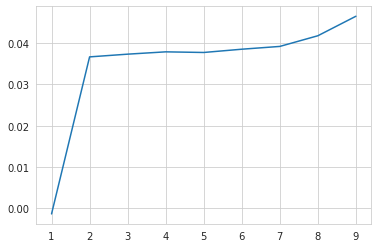

In [61]:
data_e1=[data_baseline[t].totalhrs.sum() for t in range(T0,TN)]
data_e2=[data_target[t].totalhrs.sum() for t in range(T0,TN)]
Delta=np.array(data_e2)/np.array(data_e1)-1
plt.plot(Delta)
print(pd.DataFrame(Delta,columns=['Delta_all']))

Grouped by $z$

        0      1     2     3     4     5     6     7     8     9
0.000 nan 0.138  0.128 0.101 0.085 0.094 0.078 0.063 0.063 0.062
1.000 nan 0.126  0.138 0.154 0.128 0.124 0.114 0.106 0.103 0.080
2.000 nan 0.098  0.127 0.114 0.134 0.138 0.164 0.126 0.148 0.125
3.000 nan 0.023  0.055 0.088 0.088 0.094 0.086 0.086 0.088 0.085
4.000 nan -0.003 0.036 0.035 0.035 0.035 0.036 0.037 0.039 0.044


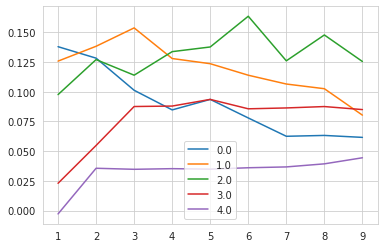

In [62]:

Delta=[]
fig, ax = plt.subplots()
for zval in np.sort(data_baseline[0].z.unique()):
    sel_baseline=[data_baseline[t].z==zval for t in range(T0,TN)]
    sel_target=[data_target[t].z==zval for t in range(T0,TN)]
    data_e1=[data_baseline[t][sel_baseline[t]].totalhrs.sum() for t in range(T0,TN)]
    data_e2=[data_target[t][sel_target[t]].totalhrs.sum() for t in range(T0,TN)]
    temp=np.array(data_e2)/np.array(data_e1)-1
    Delta.append(temp)
    ax.plot(temp)
    
ax.legend(np.sort(data_baseline[0].z.unique()))
Delta_by_z=pd.DataFrame(Delta,index=np.sort(data_baseline[0].z.unique()))    
print(Delta_by_z)

### Total hours by entreprenurs : $h_y+h_{\kappa}$

All business owners

   Delta_all
0 nan       
1 0.133     
2 0.151     
3 0.156     
4 0.157     
5 0.159     
6 0.160     
7 0.163     
8 0.165     
9 0.170     


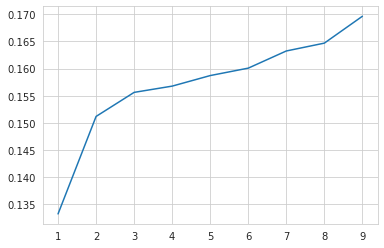

In [63]:
data_e1=[data_baseline[t].ent_hrs.sum() for t in range(T0,TN)]
data_e2=[data_target[t].ent_hrs.sum() for t in range(T0,TN)]
Delta=np.array(data_e2)/np.array(data_e1)-1
plt.plot(Delta)
print(pd.DataFrame(Delta,columns=['Delta_all']))

Grouped by $z$

        0     1     2     3     4     5     6     7     8     9
0.000 nan 0.139 0.129 0.102 0.086 0.094 0.079 0.063 0.064 0.062
1.000 nan 0.139 0.151 0.165 0.138 0.133 0.124 0.117 0.113 0.091
2.000 nan 0.151 0.186 0.170 0.198 0.197 0.234 0.188 0.214 0.188
3.000 nan 0.086 0.124 0.162 0.164 0.172 0.164 0.164 0.166 0.164
4.000 nan 0.137 0.153 0.155 0.156 0.158 0.160 0.163 0.164 0.170


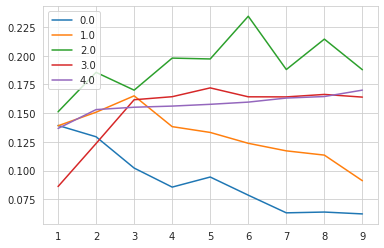

In [64]:
Delta=[]
fig, ax = plt.subplots()
for zval in np.sort(data_baseline[0].z.unique()):
    sel_baseline=[data_baseline[t].z==zval for t in range(T0,TN)]
    sel_target=[data_target[t].z==zval for t in range(T0,TN)]
    data_e1=[data_baseline[t][sel_baseline[t]].ent_hrs.sum() for t in range(T0,TN)]
    data_e2=[data_target[t][sel_target[t]].ent_hrs.sum() for t in range(T0,TN)]
    temp=np.array(data_e2)/np.array(data_e1)-1
    Delta.append(temp)
    ax.plot(temp)
    
ax.legend(np.sort(data_baseline[0].z.unique()))
Delta_by_z=pd.DataFrame(Delta,index=np.sort(data_baseline[0].z.unique()))    
print(Delta_by_z)

## Intensive Margin entreprenur hours: $h_y$+$h_{\kappa}$
In here we condition on individual who were running business in date $t=0$. We then compute the % change in hours "person-by-person" and report the 25, 50, 75 percentiles. Note that this not what GR do. But is closer to what Chettty does and calls as intensive margin. 

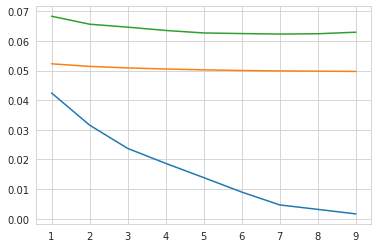

In [65]:
Delta_ent_hrs=[(data_target[t].ent_hrs-data_baseline[t].ent_hrs)/data_baseline[t].ent_hrs for t in range(T0,TN)]
sel=data_baseline[1].flagS
plt.plot([Delta_ent_hrs[t][data_baseline[1][sel].index].quantile([.25,.5,.75]) for t in range(T0,TN)])

### Num of entreprenurs 

   Delta_all
0 nan       
1 0.059     
2 0.067     
3 0.071     
4 0.072     
5 0.073     
6 0.074     
7 0.077     
8 0.078     
9 0.077     


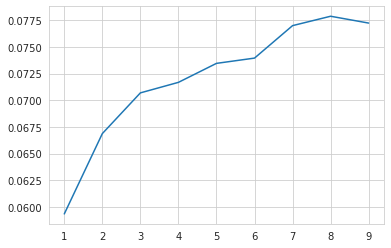

In [66]:
data_e1=[data_baseline[t].flagS.sum() for t in range(T0,TN)]
data_e2=[data_target[t].flagS.sum() for t in range(T0,TN)]
Delta=np.array(data_e2)/np.array(data_e1)-1
Delta[0]=np.nan
plt.plot(Delta)
print(pd.DataFrame(Delta,columns=['Delta_all']))

        0     1     2     3     4     5     6     7     8     9
0.000 nan 0.060 0.066 0.065 0.058 0.066 0.067 0.068 0.063 0.060
1.000 nan 0.055 0.062 0.062 0.062 0.057 0.056 0.057 0.063 0.058
2.000 nan 0.056 0.059 0.058 0.061 0.065 0.060 0.063 0.072 0.066
3.000 nan 0.036 0.046 0.059 0.065 0.064 0.064 0.069 0.070 0.070
4.000 nan 0.073 0.082 0.085 0.086 0.088 0.091 0.095 0.093 0.096


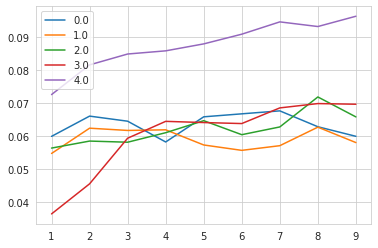

In [67]:
Delta=[]
fig, ax = plt.subplots()
for zval in np.sort(data_baseline[0].z.unique()):
    sel_baseline=[data_baseline[t].z==zval for t in range(T0,TN)]
    sel_target=[data_target[t].z==zval for t in range(T0,TN)]
    data_e1=[data_baseline[t][sel_baseline[t]].flagS.sum() for t in range(T0,TN)]
    data_e2=[data_target[t][sel_target[t]].flagS.sum() for t in range(T0,TN)]
    temp=np.array(data_e2)/np.array(data_e1)-1
    temp[0]=np.nan
    Delta.append(temp)
    ax.plot(temp)
    
ax.legend(np.sort(data_baseline[0].z.unique()))
Delta_by_z=pd.DataFrame(Delta,index=np.sort(data_baseline[0].z.unique()))    
print(Delta_by_z)

## Employee Hours: n

   Delta_all
0 nan       
1 -0.053    
2 -0.060    
3 -0.067    
4 -0.067    
5 -0.067    
6 -0.067    
7 -0.067    
8 -0.068    
9 -0.066    


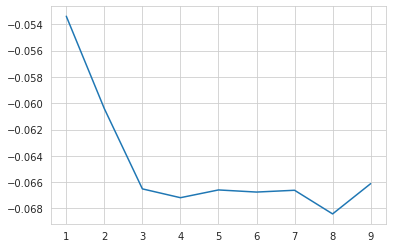

In [68]:
data_e1=[data_baseline[t].emp_hrs.sum() for t in range(T0,TN)]
data_e2=[data_target[t].emp_hrs.sum() for t in range(T0,TN)]
Delta=np.array(data_e2)/np.array(data_e1)-1
Delta[0]=np.nan
plt.plot(Delta)
print(pd.DataFrame(Delta,columns=['Delta_all']))

## Employee Hours: n intensive

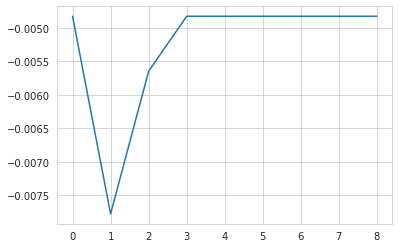

In [69]:
Delta_emp_hrs=[]
for t in range(T0,TN):
    Delta_emp_hrs.append((data_target[t].emp_hrs-data_baseline[t].emp_hrs)/data_baseline[t].emp_hrs)
sel=data_baseline[1].flagC
plt.plot([Delta_emp_hrs[t][data_baseline[1][sel].index].quantile(.5) for t in range(T0+1,TN)])